<a href="https://www.kaggle.com/code/swedhaa/stock-prediction-maang-stock-till-feb2023?scriptVersionId=165402231" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/maang-share-prices-till-february-2024/Meta Platforms Inc. (META) (2013-02.2024).csv
/kaggle/input/maang-share-prices-till-february-2024/Alphabet Inc. (GOOG) (2005-02.2024).csv
/kaggle/input/maang-share-prices-till-february-2024/Amazon.com Inc. (AMZN) (1998-02.2024).csv
/kaggle/input/maang-share-prices-till-february-2024/Netflix Inc. (NFLX) (2003-02.2024).csv
/kaggle/input/maang-share-prices-till-february-2024/Apple Inc. (AAPL) (1981-02.2024).csv


In [2]:
meta_df = pd.read_csv("/kaggle/input/maang-share-prices-till-february-2024/Meta Platforms Inc. (META) (2013-02.2024).csv")
google_df = pd.read_csv("/kaggle/input/maang-share-prices-till-february-2024/Alphabet Inc. (GOOG) (2005-02.2024).csv")
amazon_df = pd.read_csv("/kaggle/input/maang-share-prices-till-february-2024/Amazon.com Inc. (AMZN) (1998-02.2024).csv")
netflix_df = pd.read_csv("/kaggle/input/maang-share-prices-till-february-2024/Netflix Inc. (NFLX) (2003-02.2024).csv")
apple_df = pd.read_csv("/kaggle/input/maang-share-prices-till-february-2024/Apple Inc. (AAPL) (1981-02.2024).csv")
                    
meta_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,27.440001,28.180000,27.420000,28.000000,27.970324,69846400
1,2013-01-03,27.879999,28.469999,27.590000,27.770000,27.740568,63140600
2,2013-01-04,28.010000,28.930000,27.830000,28.760000,28.729517,72715400
3,2013-01-07,28.690001,29.790001,28.650000,29.420000,29.388819,83781800
4,2013-01-08,29.510000,29.600000,28.860001,29.059999,29.029200,45871300
...,...,...,...,...,...,...,...
2800,2024-02-16,478.109985,478.959991,469.209991,473.320007,472.818329,23306500
2801,2024-02-20,469.720001,476.179993,466.559998,471.750000,471.250000,18015500
2802,2024-02-21,466.500000,469.000000,461.790009,468.029999,468.029999,12977100
2803,2024-02-22,480.239990,489.989990,476.059998,486.130005,486.130005,21625800


## Cleaning and visulizing the Stock Low

In [3]:
#changing date dtype to datetime format and then chaning the index to the date
meta_df['Date'] = pd.to_datetime(meta_df['Date'])
meta_df.set_index('Date', inplace=True)

google_df['Date'] = pd.to_datetime(google_df['Date'])
google_df.set_index('Date', inplace=True)

amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])
amazon_df.set_index('Date', inplace=True)

netflix_df['Date'] = pd.to_datetime(netflix_df['Date'])
netflix_df.set_index('Date', inplace=True)

apple_df['Date'] = pd.to_datetime(apple_df['Date'])
apple_df.set_index('Date', inplace=True)


<Figure size 1000x600 with 0 Axes>

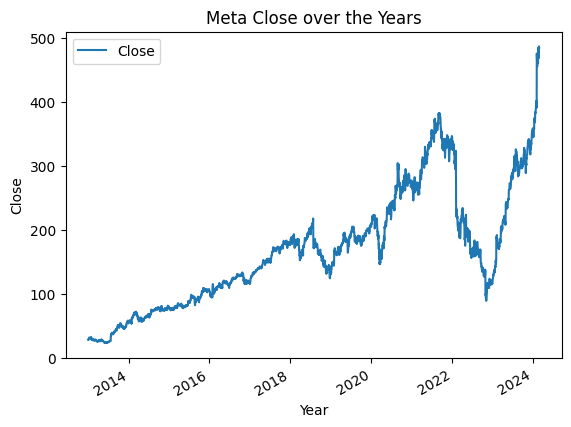

In [4]:
#no null data in all the data frame 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
meta_df.plot(y='Close',use_index = True)
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Meta Close over the Years')
plt.show()


<Figure size 1000x600 with 0 Axes>

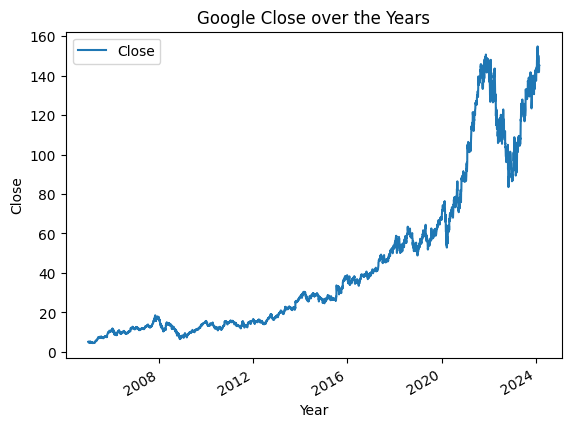

In [5]:
plt.figure(figsize=(10, 6))
google_df.plot(y='Close',use_index = True)
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Google Close over the Years')
plt.show()

<Figure size 1000x600 with 0 Axes>

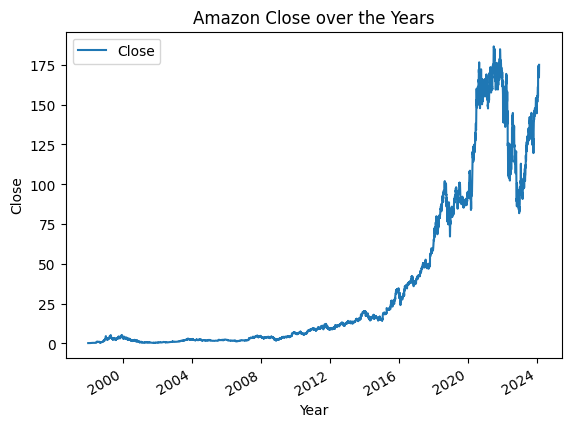

In [6]:
plt.figure(figsize=(10, 6))
amazon_df.plot(y='Close',use_index = True)
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Amazon Close over the Years')
plt.show()

<Figure size 1000x600 with 0 Axes>

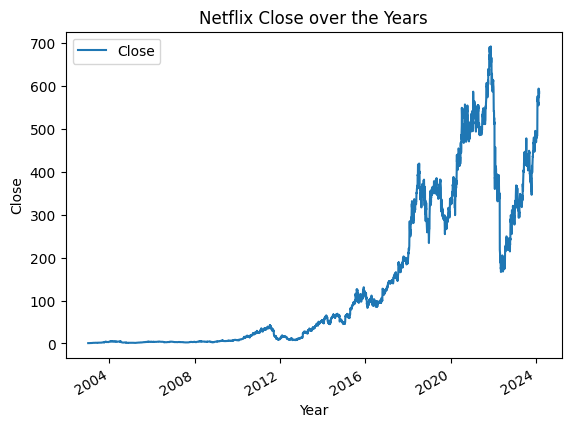

In [7]:
plt.figure(figsize=(10, 6))
netflix_df.plot(y='Close',use_index = True)
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Netflix Close over the Years')
plt.show()

<Figure size 1000x600 with 0 Axes>

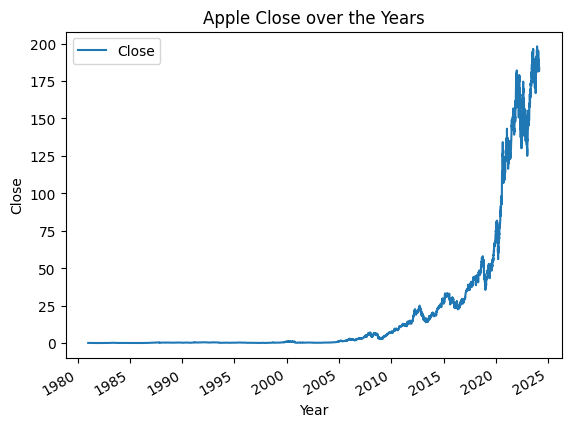

In [8]:
plt.figure(figsize=(10, 6))
apple_df.plot(y='Close',use_index = True)
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Apple Close over the Years')
plt.show()

## META
### Setting up Target variable for Machine Leaerning model

In [9]:
meta_df['Tomorrow'] = meta_df["Close"].shift(-1)
meta_df.head(3)

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
2013-01-02,27.440001,28.180000,27.42,28.00,27.970324,69846400,27.77
2013-01-03,27.879999,28.469999,27.59,27.77,27.740568,63140600,28.76
2013-01-04,28.010000,28.930000,27.83,28.76,28.729517,72715400,29.42


In [10]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2805 entries, 2013-01-02 to 2024-02-23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2805 non-null   float64
 1   High       2805 non-null   float64
 2   Low        2805 non-null   float64
 3   Close      2805 non-null   float64
 4   Adj Close  2805 non-null   float64
 5   Volume     2805 non-null   int64  
 6   Tomorrow   2804 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 175.3 KB


In [11]:
meta_df["Target"] =( meta_df["Tomorrow"] > meta_df["Close"]).astype(int)
meta_df.head(100)

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2013-01-02,27.440001,28.180000,27.420000,28.000000,27.970324,69846400,27.770000,0
2013-01-03,27.879999,28.469999,27.590000,27.770000,27.740568,63140600,28.760000,1
2013-01-04,28.010000,28.930000,27.830000,28.760000,28.729517,72715400,29.420000,1
2013-01-07,28.690001,29.790001,28.650000,29.420000,29.388819,83781800,29.059999,0
2013-01-08,29.510000,29.600000,28.860001,29.059999,29.029200,45871300,30.590000,1
...,...,...,...,...,...,...,...,...
2013-05-20,26.180000,26.190001,25.690001,25.760000,25.732697,42402900,25.660000,0
2013-05-21,25.870001,26.080000,25.590000,25.660000,25.632803,26261300,25.160000,0
2013-05-22,25.650000,25.850000,24.920000,25.160000,25.133333,45314500,25.059999,0


## Random Forest Classification Model for Meta

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000, min_samples_split=50, random_state = 1)

train = meta_df.iloc[:-100]
test = meta_df.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=50, n_estimators=1000, random_state=1)

In [13]:
from sklearn.metrics import precision_score

predictions = model.predict(test[predictors])
predictions = pd.Series(predictions,index = test.index)

In [14]:
precision_score(test["Target"],predictions)

0.5714285714285714

<Axes: xlabel='Date'>

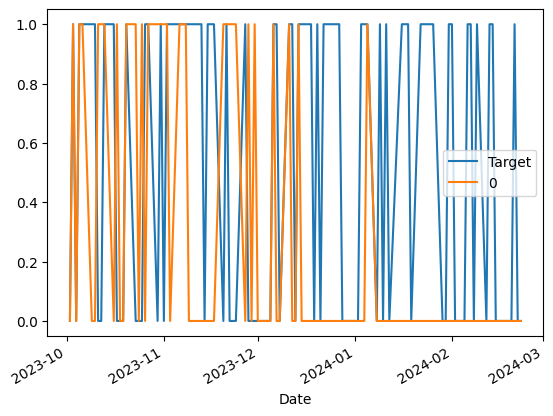

In [15]:
combined = pd.concat([test['Target'], predictions],axis = 1)
combined.plot()

In [16]:
def predict(train,test,predictors, model):
    model.fit(train[predictors],train["Target"])
    predictions = model.predict_proba(test[predictors])[:,1]
    predictions[predictions >= 0.6] = 1
    predictions[predictions < 0.6] = 0

    predictions = pd.Series(predictions,index = test.index, name="Predictions")
    
    combined = pd.concat([test["Target"], predictions], axis =1)
    return combined

In [17]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [18]:
predictions = backtest(meta_df, model, predictors)


In [19]:
predictions["Predictions"].value_counts()

Predictions
0.0    256
1.0     49
Name: count, dtype: int64

In [20]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5918367346938775

In [21]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.544262
0    0.455738
Name: count, dtype: float64

In [22]:

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split

# Define predictors and target variable
predictors = ["Close", "Volume", "Open", "High", "Low"]
target = "Tomorrow"

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(meta_df[predictors], meta_df[target], test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


# Define your neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        #self.fc1 = nn.Linear(5,128)  # First hidden layer
        #self.fc2 = nn.Linear(128,64)  # Second hidden layer
        #self.fc3 = nn.Linear(64,32)  # Third hidden layer
        #self.fc4 = nn.Linear(32,16)  # Fourth hidden layer
        #self.fc5 = nn.Linear(16,1)   # Output layer
        self.fc1 = nn.Linear(5, 64)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(64, 64)  # First hidden layer to second hidden layer
        self.output_layer = nn.Linear(64, 1)  # Output layer

    
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation to first hidden layer
        x = torch.relu(self.fc2(x))  # Apply ReLU activation to second hidden layer
        x = self.output_layer(x)  # Output layer
        return x
        """
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x
        """
       

# Initialize your model
model = NeuralNetwork()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(3000):
    optimizer.zero_grad()  # Zero the gradients
    output = model(X_train_tensor)  # Forward pass
    loss = criterion(output, y_train_tensor)  # Compute the loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights
    
    # Print loss for monitoring
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{3000}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    predicted = model(X_test_tensor)
    test_loss = criterion(predicted, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')
    


Epoch [500/3000], Loss: 22053.3711
Epoch [1000/3000], Loss: 21568.8184
Epoch [1500/3000], Loss: 20858.3828
Epoch [2000/3000], Loss: 19917.0449
Epoch [2500/3000], Loss: 18723.2871
Epoch [3000/3000], Loss: 17262.3750
Test Loss: nan


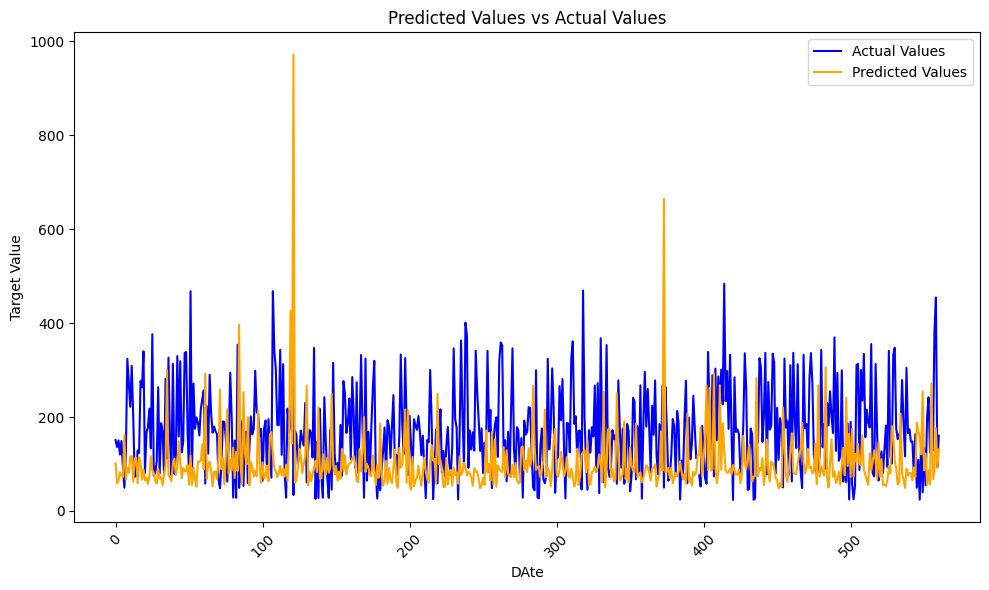

In [23]:
# Assuming you have a 'Date' column in your 'test' DataFrame
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(y_test_tensor, label='Actual Values', color='blue')
plt.plot(predicted, label='Predicted Values', color='orange')
plt.title('Predicted Values vs Actual Values')
plt.xlabel('DAte')
plt.ylabel('Target Value')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


## k-fold cross validation method to evalute neural model

In [24]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store evaluation results
train_losses = []
test_losses = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_train_tensor)):
    print(f'Fold {fold+1}/{k}:')
    
    # Split the data into train and test sets for this fold
    X_fold_train, X_fold_test = X_train_tensor[train_index], X_train_tensor[test_index]
    y_fold_train, y_fold_test = y_train_tensor[train_index], y_train_tensor[test_index]
    
    # Initialize your model
    model = NeuralNetwork()
    
    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    for epoch in range(3000):
        optimizer.zero_grad()  # Zero the gradients
        output = model(X_fold_train)  # Forward pass
        loss = criterion(output, y_fold_train)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    # Evaluate on train set
    with torch.no_grad():
        train_output = model(X_fold_train)
        train_loss = criterion(train_output, y_fold_train)
        train_losses.append(train_loss.item())
        print(f'Train Loss: {train_loss.item():.4f}')
    
    # Evaluate on test set
    with torch.no_grad():
        test_output = model(X_fold_test)
        test_loss = criterion(test_output, y_fold_test)
        test_losses.append(test_loss.item())
        print(f'Test Loss: {test_loss.item():.4f}')
    
    print('---')

# Calculate mean and standard deviation of losses across folds
mean_train_loss = np.mean(train_losses)
mean_test_loss = np.mean(test_losses)
std_train_loss = np.std(train_losses)
std_test_loss = np.std(test_losses)

print('Overall Results:')
print(f'Mean Train Loss: {mean_train_loss:.4f} ± {std_train_loss:.4f}')
print(f'Mean Test Loss: {mean_test_loss:.4f} ± {std_test_loss:.4f}')


Fold 1/5:
Train Loss: 17960.0859
Test Loss: 18308.1113
---
Fold 2/5:
Train Loss: 26553.1426
Test Loss: 25017.0703
---
Fold 3/5:
Train Loss: 23198.0879
Test Loss: 28115.7500
---
Fold 4/5:
Train Loss: 10767.9521
Test Loss: 10254.1602
---
Fold 5/5:
Train Loss: 24246.1895
Test Loss: 22161.0293
---
Overall Results:
Mean Train Loss: 20545.0916 ± 5641.0620
Mean Test Loss: 20771.2242 ± 6173.7572
